In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [3]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [4]:
s = 40.0
data = data[data[3]==s]
data.head()

,0,1,2,3,4,5,6,7
1662845,2004-02-28,00:58:47.222833,2,40.0,19.5964,37.5737,172.96,2.68742
1662846,2004-02-28,01:03:16.981838,11,40.0,18.8810,39.1443,172.96,2.68742
1662847,2004-02-28,01:06:46.345,18,40.0,18.7536,39.2123,172.96,2.68742
1662848,2004-02-28,01:07:16.641882,19,40.0,18.7340,39.3483,172.96,2.68742
1662849,2004-02-28,01:07:46.056582,20,40.0,18.7144,39.3483,172.96,2.69964


In [5]:
# print(S1df.shape)
outliersILista = []
outliersIListaV = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersILista.append(i)
        outliersIListaV.append(row[4])
print(data.shape, len(outliersILista))
# Removendo outliers no sensor
passo3= data.copy()
print(passo3.head())
print(passo3.shape)
passo3= passo3.drop(outliersILista)
print(passo3.shape)
passo3.to_csv('sensor.csv')
data = pd.read_csv("sensor.csv")
data.shape
data.drop(['Unnamed: 0'], axis=1,inplace=True)
# data.head(1)
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

(46624, 8) 11799
                  0                1   2     3        4        5       6  \
1662845  2004-02-28  00:58:47.222833   2  40.0  19.5964  37.5737  172.96   
1662846  2004-02-28  01:03:16.981838  11  40.0  18.8810  39.1443  172.96   
1662847  2004-02-28     01:06:46.345  18  40.0  18.7536  39.2123  172.96   
1662848  2004-02-28  01:07:16.641882  19  40.0  18.7340  39.3483  172.96   
1662849  2004-02-28  01:07:46.056582  20  40.0  18.7144  39.3483  172.96   

               7  
1662845  2.68742  
1662846  2.68742  
1662847  2.68742  
1662848  2.68742  
1662849  2.69964  
(46624, 8)
(34825, 8)
40.0 
             0                1   2     3        4        5       6        7
0  2004-02-28  00:58:47.222833   2  40.0  19.5964  37.5737  172.96  2.68742
1  2004-02-28  01:03:16.981838  11  40.0  18.8810  39.1443  172.96  2.68742
2  2004-02-28     01:06:46.345  18  40.0  18.7536  39.2123  172.96  2.68742
3  2004-02-28  01:07:16.641882  19  40.0  18.7340  39.3483  172.96  2.68742
4  

In [6]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()

d = d.sort_values(['0','1'],ascending = [1,1])
d.shape, (d.tail())

((34825, 8),
                 0                1      2     3        4        5     6  \
 19994  2004-03-23  03:53:31.322351  32995  40.0  26.1820  52.6199  0.46   
 19995  2004-03-23  03:58:08.491879  33004  40.0  26.1624  52.7150  0.46   
 31004  2004-03-31  20:59:28.060438  58086  40.0      NaN      NaN   NaN   
 32146  2004-04-01  12:08:22.868613  59904  40.0      NaN      NaN   NaN   
 32162  2004-04-01   12:17:18.45651  59922  40.0      NaN      NaN   NaN   
 
              7  
 19994  2.28431  
 19995  2.28431  
 31004  2.15971  
 32146  2.17553  
 32162  2.17553  )

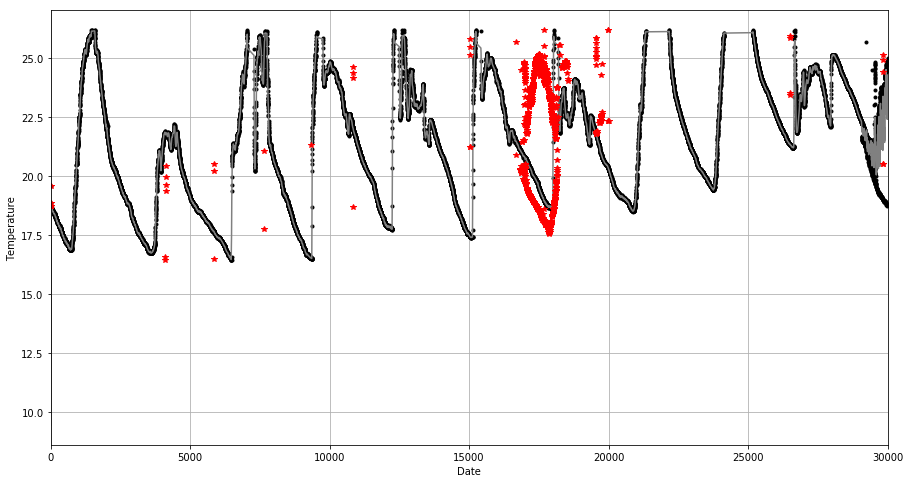

In [8]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")



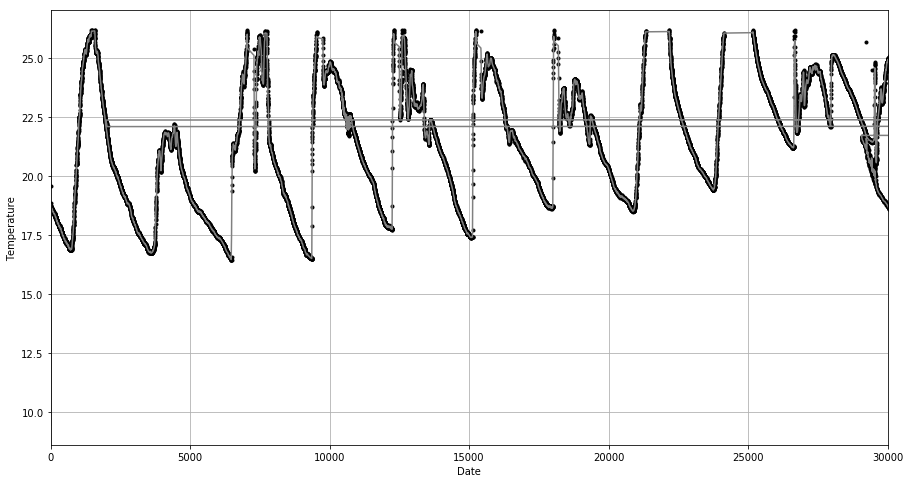

In [9]:
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

In [10]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    print(len(x_anomaly))
    return x_anomaly

x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

447


array([    0,     1,     2,     3,     4,  4099,  4100,  4101,  4102,
        4103,  4104,  4105,  4106,  4107,  4108,  4450,  4451,  4452,
        4453,  4454,  4455,  4456,  4457,  4458,  4459,  4460,  4461,
        4470,  4514,  4515,  4516,  4517,  4527,  4554,  4593,  5844,
        5845,  5846,  5849,  5850,  5851,  5852,  5853,  5854,  5855,
        5960,  5967,  5968,  6389,  6391,  6414,  6475,  6484,  6489,
        6490,  6492,  6499,  6502,  6504,  6507,  6508,  6514,  6517,
        6518,  6519,  6521,  6522,  6523,  6524,  6529,  6530,  6531,
        6532,  6536,  6541,  6547,  6551,  6559,  6560,  6561,  6562,
        6563,  6564,  6565,  6566,  6567,  6568,  6569,  6570,  6571,
        6572,  6574,  6575,  6578,  6579,  7633,  7634,  7635,  7636,
        7637,  7638,  7639,  7640,  7641,  7643,  7644,  7645,  7646,
        7647,  7671,  7672,  7673,  7678,  7681,  7682,  7683,  7684,
        7749,  7750,  7906,  7907,  9310,  9311,  9312,  9314,  9315,
        9316,  9317,

(34825, 8)
(34378, 8)
447


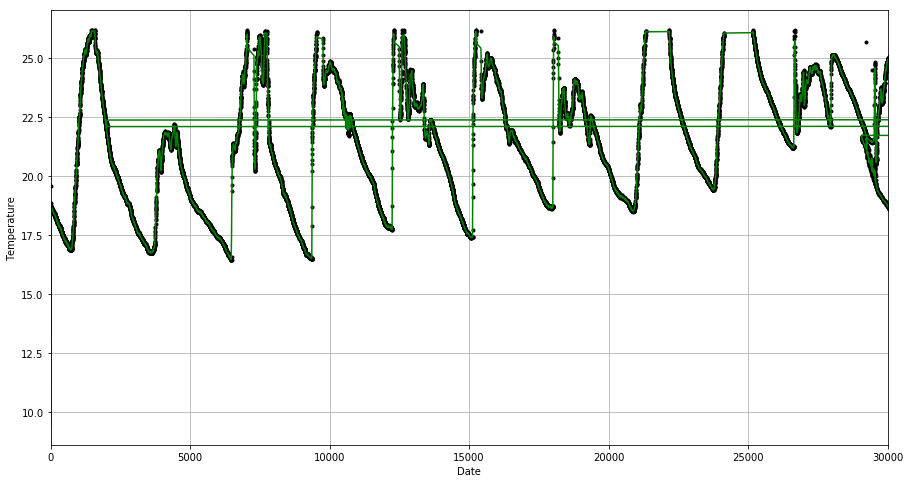

In [11]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

# Depois de ter os dados reconstruídos - verificamos a série temporal

3750


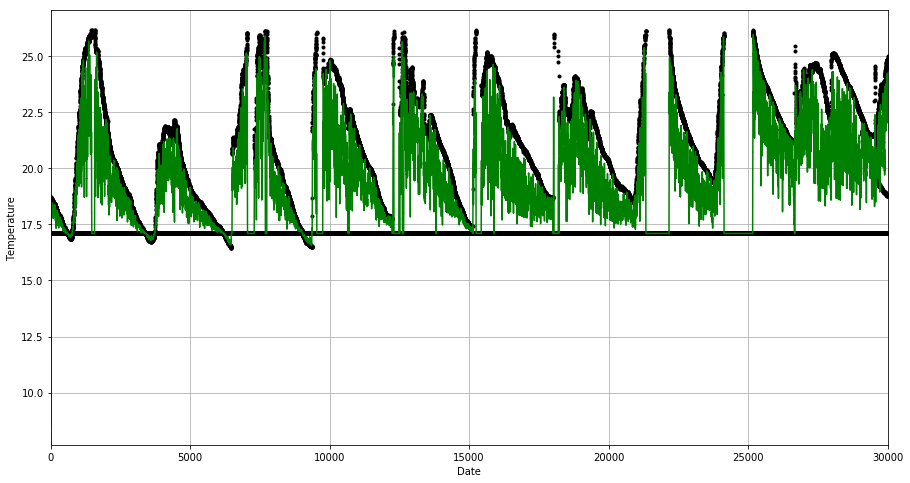

In [23]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")


# Estatísticas Simples

In [12]:
dplot[dplot['Moteid']==s].shape
# Passo 0
sensor = s
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==sensor].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,46624,36.552531,34.172157,22.8598,23.651935


In [13]:
# Passo 1
myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),34825,21.634705,2.180979,21.8014,1.798405


In [14]:
    # Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

34378


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,34378,21.629605,2.179419,21.8014,1.797643


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [21]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,19.472837,2.758075,17.6266,2.489045


In [22]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )

  Data type   size       mean         SD   median        MAD
0  Raw Data  46624  36.552531  34.172157  22.8598  23.651935
      Data type   size       mean        SD   median       MAD
0  step 1 (BOR)  34825  21.634705  2.180979  21.8014  1.798405
     Data type   size       mean        SD   median       MAD
0  step 2 (AOR  34378  21.629605  2.179419  21.8014  1.797643
  Data type   size       mean        SD   median       MAD
0    step 3  65536  19.472837  2.758075  17.6266  2.489045


##  Etapa para reconstruir as Épocas que estão faltando

In [15]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)
passoOEp = passoO['2'].tolist()
len(passoOEp)

idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))

31204
65536 34332


In [16]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((34825, 8), int,              1
 2004-02-28  48)

In [17]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
# dfOut.tail(10)


31204


# Gerando o csv para fazer reconstrução dos dados

In [18]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(10)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(65582, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [20]:
final= pd.read_csv('finalsensor.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (65582, 8))